## Loading Dataset

In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [366]:
df=pd.read_csv('Breast Cancer Dataset.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Description of DataSet
 -  These columns likely represent the mean values of these features for each cell nucleus.

- **Mean Values:**
  - `radius_mean`
  - `texture_mean`
  - `perimeter_mean`
  - `area_mean`
  - `smoothness_mean`
  - `compactness_mean`
  - `concavity_mean`
  - `concave points_mean`
  - `symmetry_mean`
  - `fractal_dimension_mean`
  
 - These columns probably represent the standard errors of the corresponding features. 

- **Standard Errors:**
  - `radius_se`
  - `texture_se`
  - `perimeter_se`
  - `area_se`
  - `smoothness_se`
  - `compactness_se`
  - `concavity_se`
  - `concave points_se`
  - `symmetry_se`
  - `fractal_dimension_se`

  
- These columns likely represent the worst (largest) values of these features.
  
- **Worst (Largest) Values:**
  - `radius_worst`
  - `texture_worst`
  - `perimeter_worst`
  - `area_worst`
  - `smoothness_worst`
  - `compactness_worst`
  - `concavity_worst`
  - `concave points_worst`
  -
- **Output**
   - malignant (cancerous) **M**
   - benign (non-cancerous) **C**

In [367]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Preprocessing  and Data Cleaning

### Mapping M to 1 and B to 0

In [369]:

df['diagnosis']=df['diagnosis'].map({"M":1,"B":0})

In [370]:

df['diagnosis'].tail(5)

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64

### Checking and removing NAN values

<Axes: >

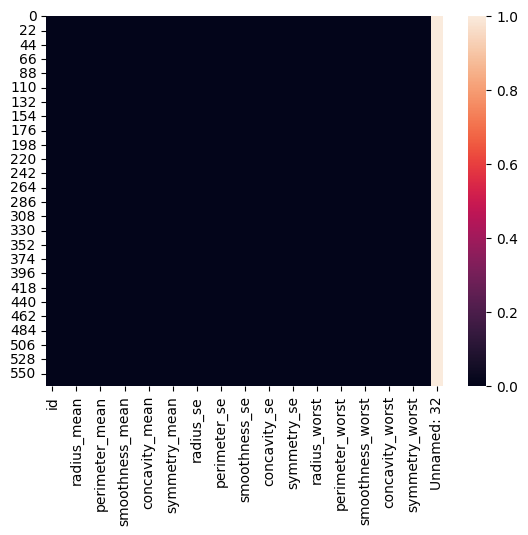

In [371]:
sns.heatmap(df.isnull())

In [372]:
df=df.dropna(axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [373]:
df=df.drop('id',axis=1)


In [374]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


<Axes: >

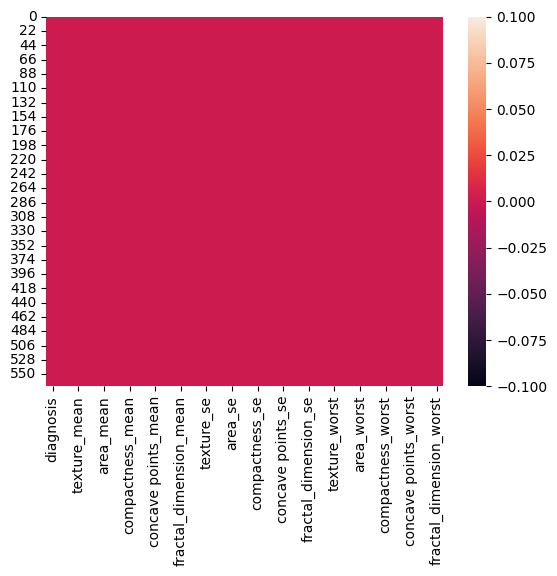

In [375]:
sns.heatmap(df.isnull())

## Ploting the realtion b/w Output and Different Features


In [376]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_relation(x, y, df):
    sns.lmplot(data=df, x=x, y=y, hue='diagnosis',markers=['o','x'] )
    g=sns.FacetGrid(data=df,col='diagnosis')
    g.map(sns.histplot,x)
    g2=sns.FacetGrid(data=df,col='diagnosis')
    g2.map(sns.histplot,y)
    plt.show()



In [377]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

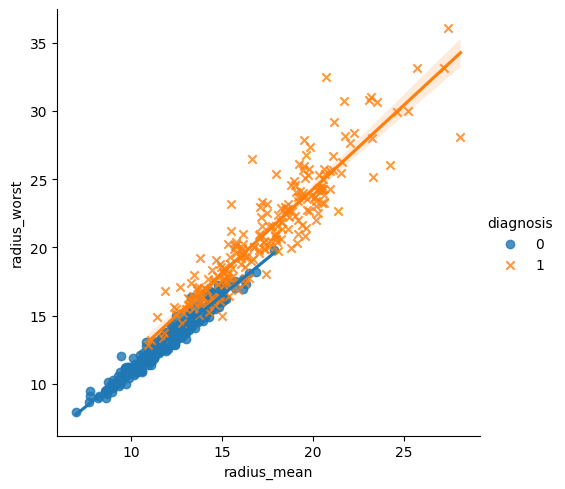

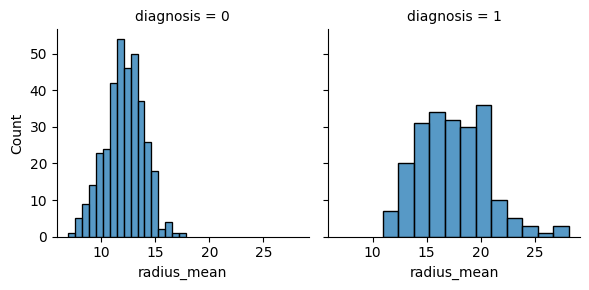

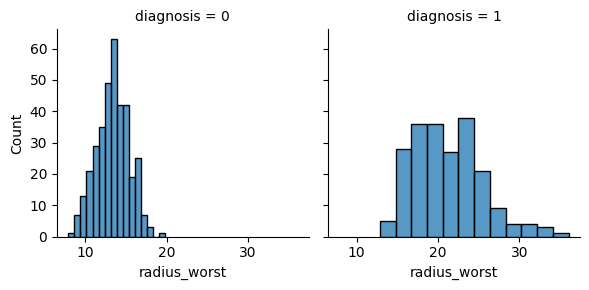

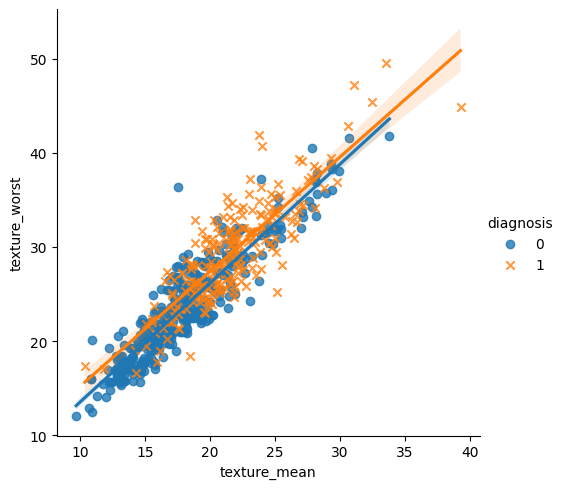

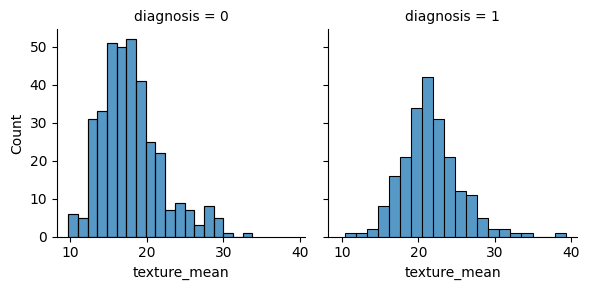

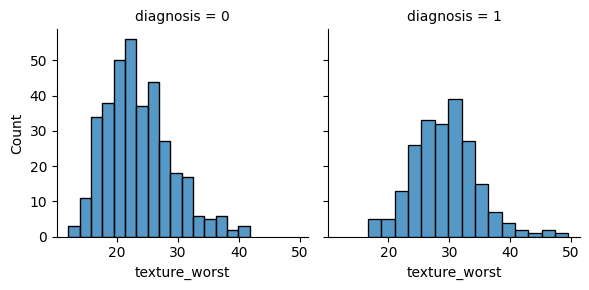

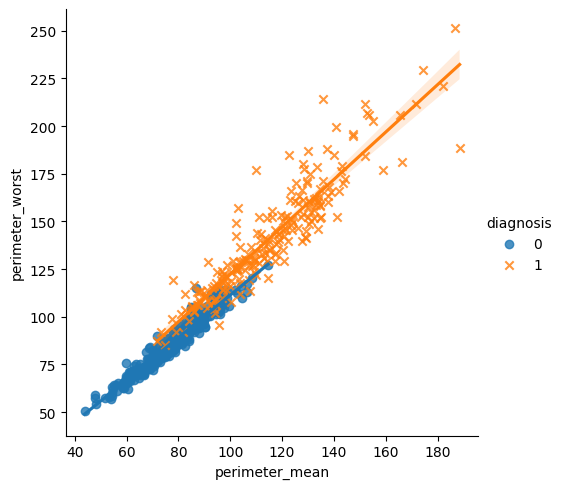

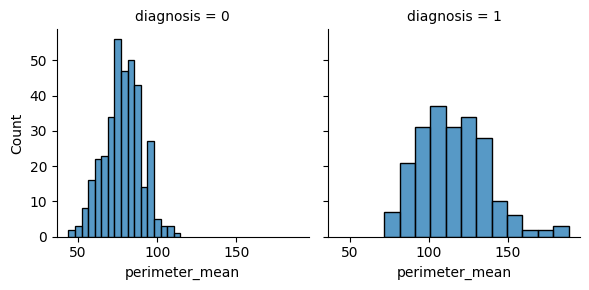

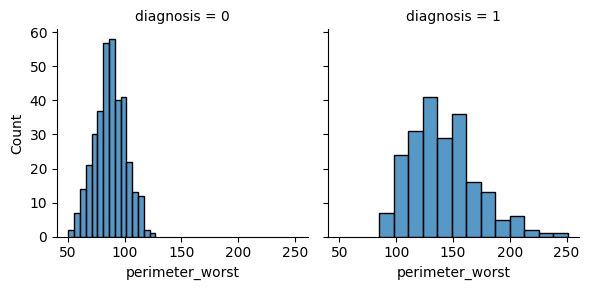

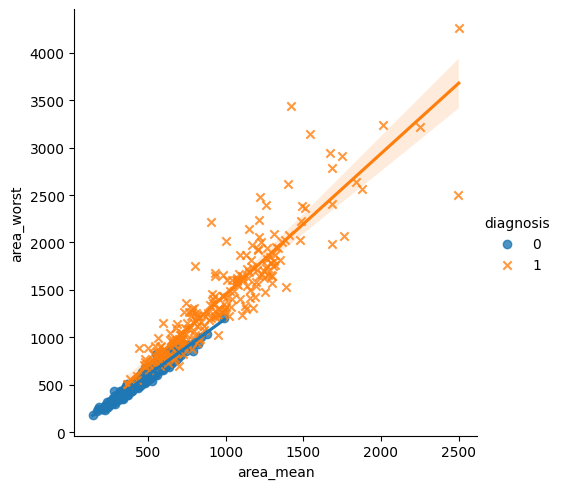

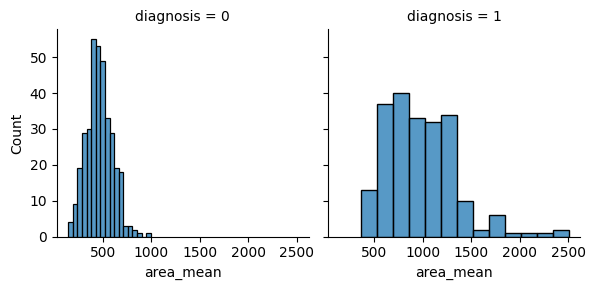

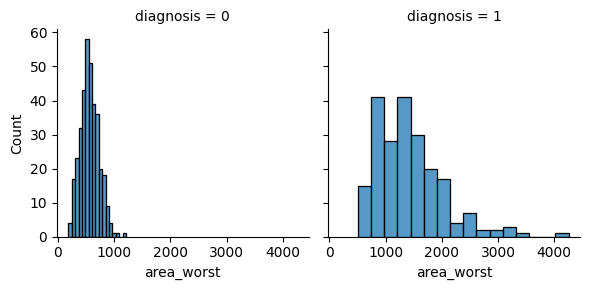

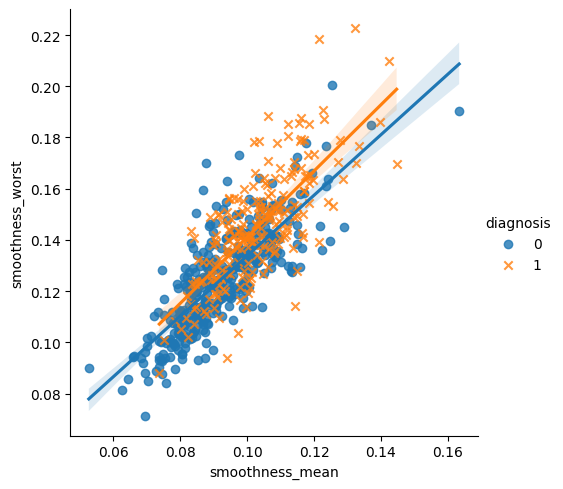

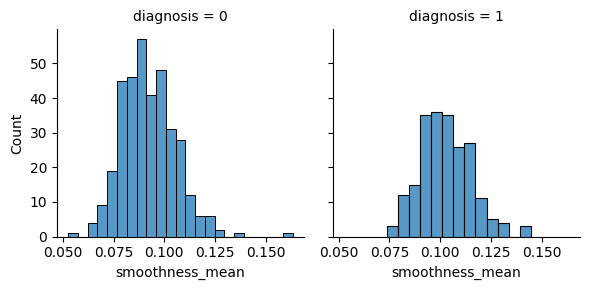

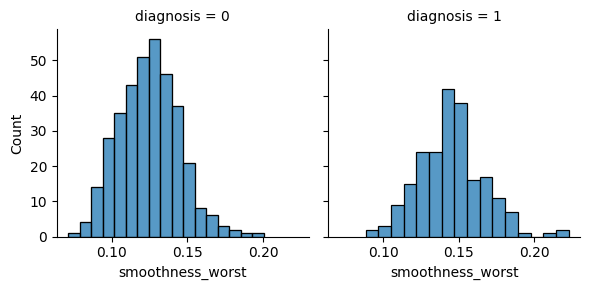

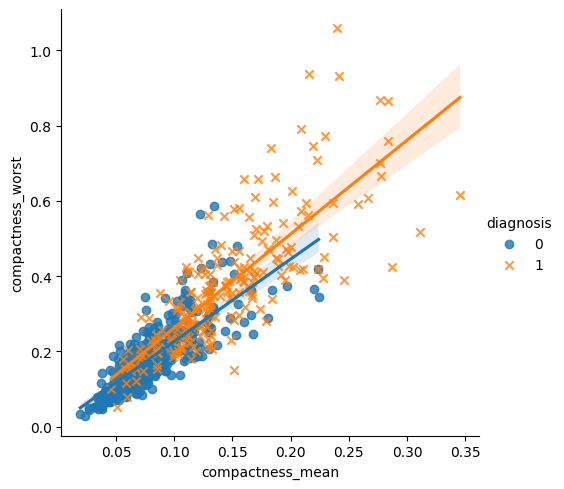

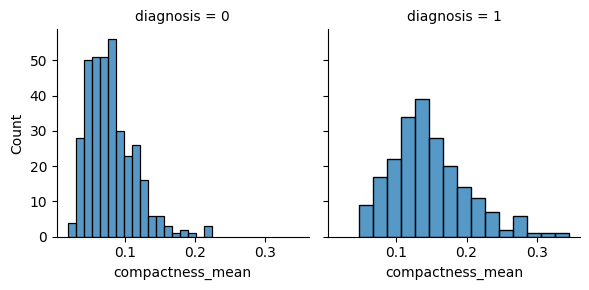

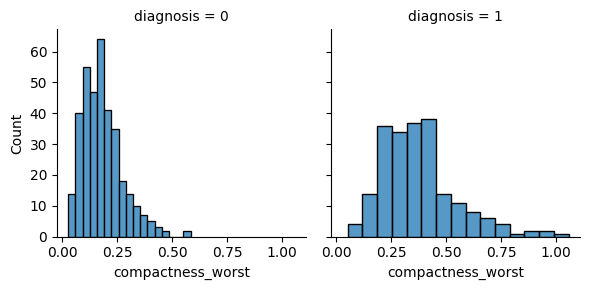

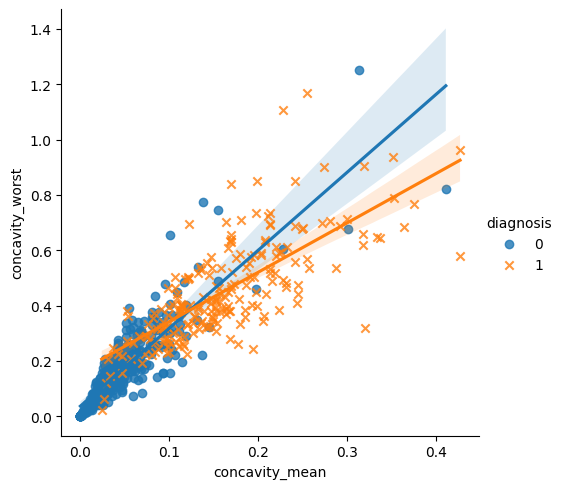

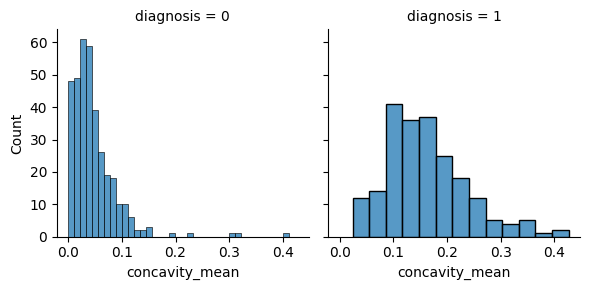

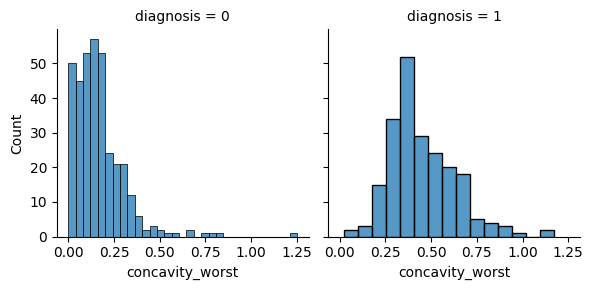

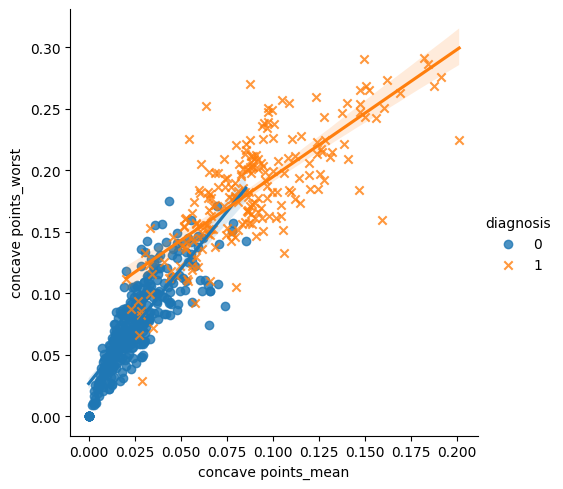

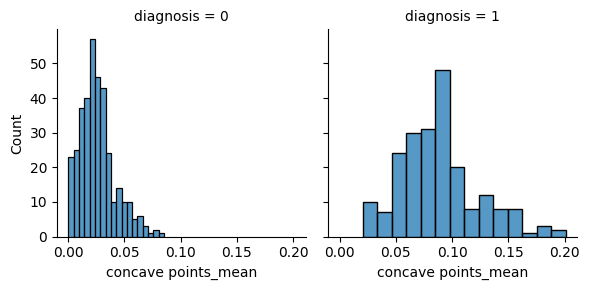

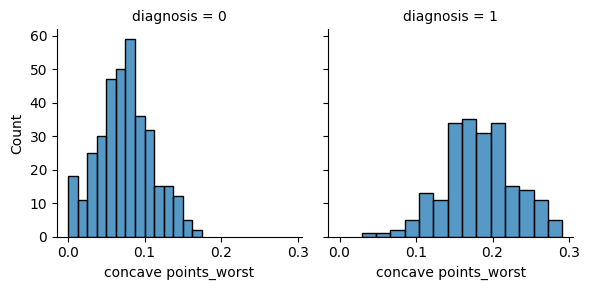

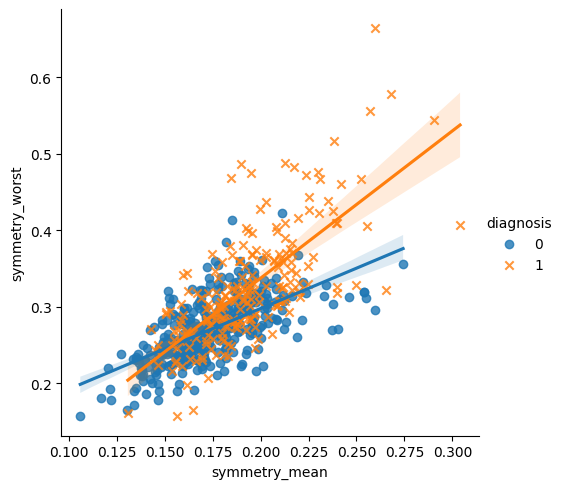

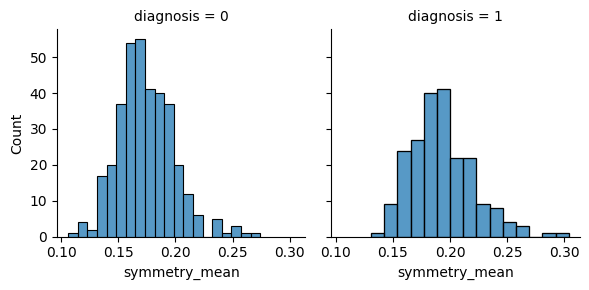

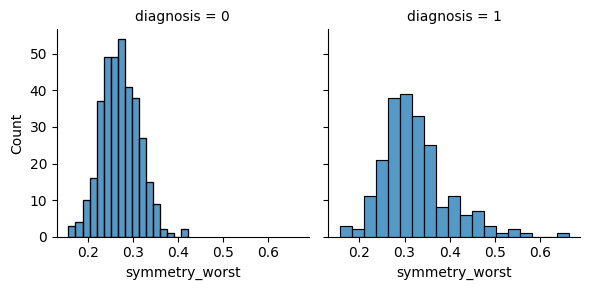

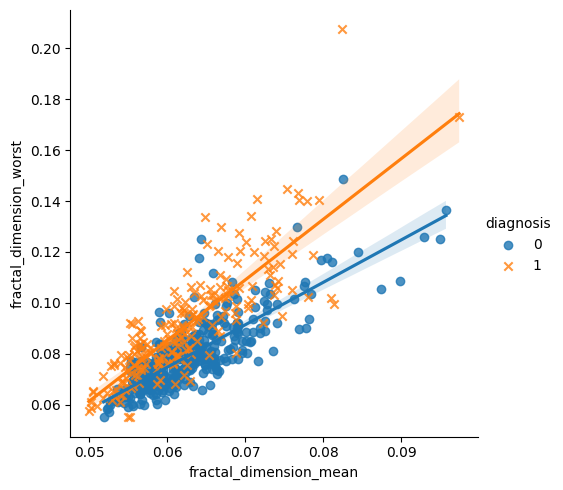

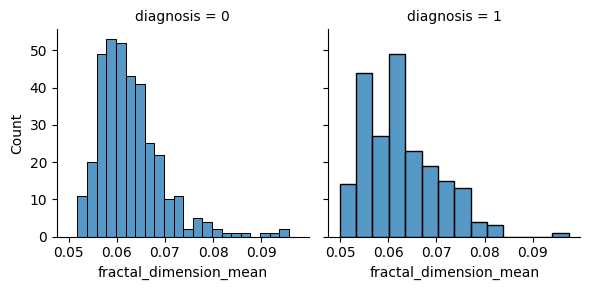

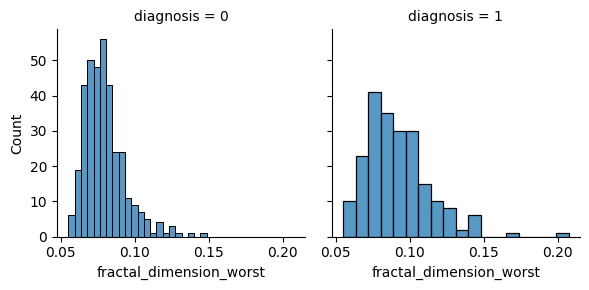

In [378]:

col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        ]
col_T=['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for i in range(len(col)):
    plot_relation(col[i],col_T[i], df)

<Axes: >

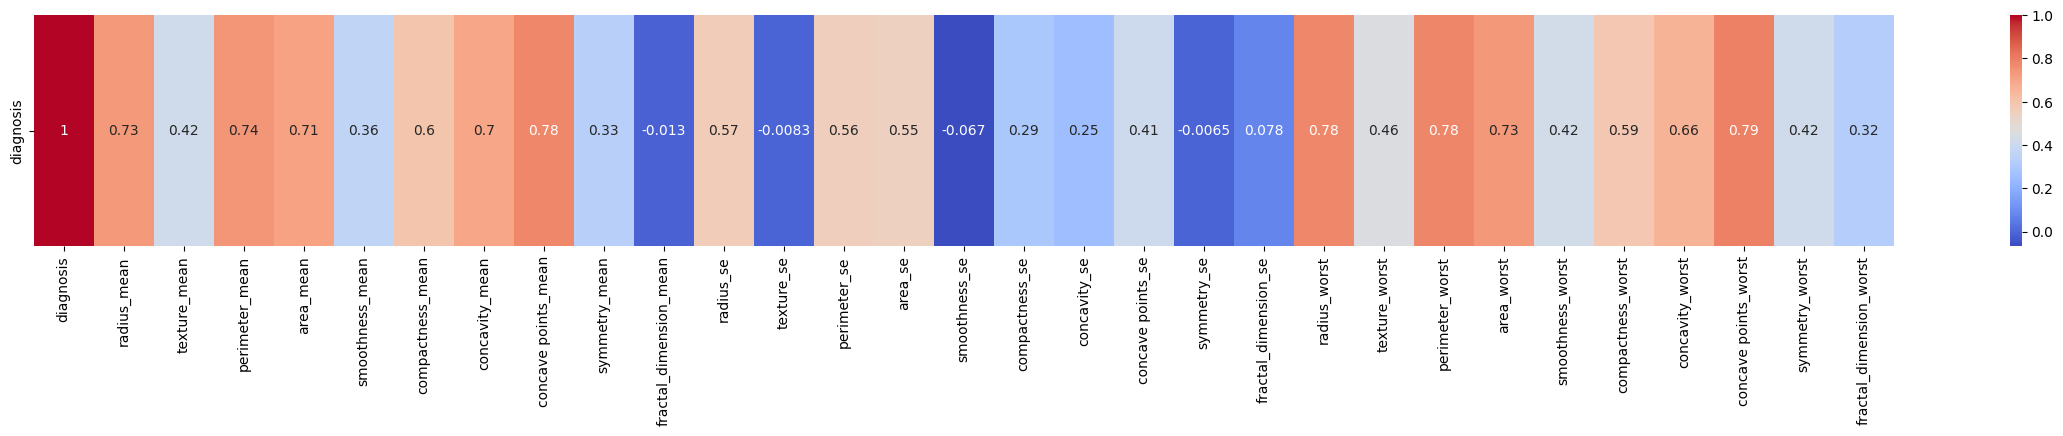

In [379]:
plt.figure(figsize=(30,3))
sns.heatmap(df.corr()[0:1],annot=True,cmap="coolwarm")

## Splitting and  Standardization 

In [380]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

### Splitting

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


### Standardization 

In [382]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)


 ## Using KNN with n_neighbors=1

In [383]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_std,y_train)


KNeighborsClassifier(n_neighbors=1)

## Predicting



In [384]:
predictions=model.predict(X_test_std)
prnt=predictions[:10].reshape(10,1)
prnt

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [385]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [386]:
print(metrics.confusion_matrix(y_test,predictions))

[[70  2]
 [ 4 38]]


## Finding where actual values differ from Predicted

In [387]:
pre_arr=np.array(predictions)
y_test_arr=np.array(y_test)
mismatch=np.where(pre_arr!=y_test_arr)[0]
for i in mismatch:
    print(f"Index  {i}: Actual Prediction : {y_test_arr[i]} v/s Model predicts : {pre_arr[i]}")

Index  19: Actual Prediction : 1 v/s Model predicts : 0
Index  30: Actual Prediction : 0 v/s Model predicts : 1
Index  61: Actual Prediction : 1 v/s Model predicts : 0
Index  77: Actual Prediction : 1 v/s Model predicts : 0
Index  80: Actual Prediction : 0 v/s Model predicts : 1
Index  89: Actual Prediction : 1 v/s Model predicts : 0


Text(0.5, 1.0, 'Actual vs Predicted Values with Misclassified Points Highlighted')

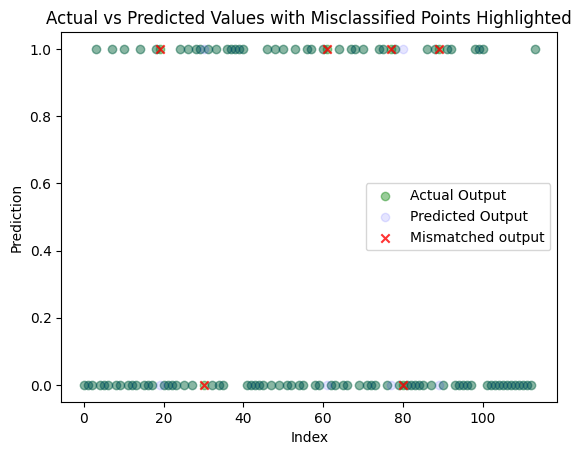

In [388]:
plt.scatter(range(len(y_test_arr)),y_test_arr,color='green',label="Actual Output",alpha=0.4)
plt.scatter(range(len(y_test_arr)),pre_arr,color='blue',label="Predicted Output",alpha=0.1)
plt.scatter(mismatch,y_test_arr[mismatch],color='red',label="Mismatched output",alpha=0.8,marker='x')
plt.xlabel('Index')
plt.ylabel('Prediction')
plt.legend()
plt.title('Actual vs Predicted Values with Misclassified Points Highlighted')

In [389]:
train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train_std))
print("Train set Accuracy: ", train_accuracy)
test_accuracy = metrics.accuracy_score(y_test, predictions)
print("Test set Accuracy: ", test_accuracy)

Train set Accuracy:  1.0
Test set Accuracy:  0.9473684210526315


## Using Elbow Method for better value of k

In [390]:
err=[]
for i in range(1,30):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_std,y_train)
    predictions=model.predict(X_test_std)
    err.append(np.mean(predictions!=y_test))
err

[np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.043859649122807015),
 np.float64(0.02631578947368421),
 np.float64(0.03508771929824561),
 np.float64(0.03508771929824561),
 np.float64(0.03508771929824561),
 np.float64(0.03508771929824561),
 np.float64(0.03508771929824561),
 np.float64(0.017543859649122806),
 np.float64(0.03508771929824561),
 np.float64(0.03508771929824561),
 np.float64(0.043859649122807015),
 np.float64(0.02631578947368421),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842)]

Minimum k :  11


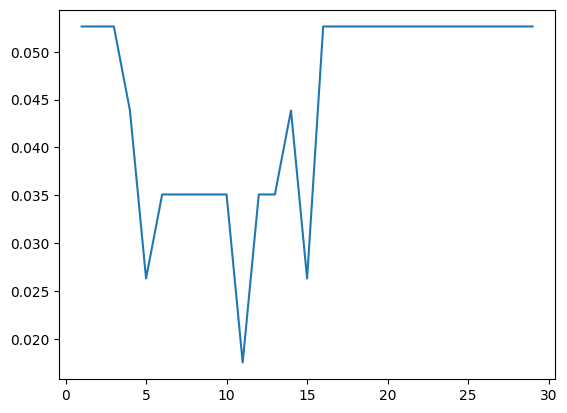

In [391]:
plt.plot(range(1,30),err)
print("Minimum k : ",np.argmin(err)+1)

## For K = 3

In [392]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_std,y_train)
predictions=model.predict(X_test_std)

In [393]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [394]:
train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train_std))
print("Train set Accuracy: ", train_accuracy)
test_accuracy = metrics.accuracy_score(y_test, predictions)
print("Test set Accuracy: ", test_accuracy)

Train set Accuracy:  0.978021978021978
Test set Accuracy:  0.9473684210526315


In [395]:
print(metrics.confusion_matrix(y_test,predictions))

[[70  2]
 [ 4 38]]


In [396]:
pre_arr=np.array(predictions)
y_test_arr=np.array(y_test)
mismatch=np.where(pre_arr!=y_test_arr)[0]
for i in mismatch:
    print(f"Index  {i}: Actual Prediction : {y_test_arr[i]} v/s Model predicts : {pre_arr[i]}")

Index  19: Actual Prediction : 1 v/s Model predicts : 0
Index  30: Actual Prediction : 0 v/s Model predicts : 1
Index  61: Actual Prediction : 1 v/s Model predicts : 0
Index  77: Actual Prediction : 1 v/s Model predicts : 0
Index  80: Actual Prediction : 0 v/s Model predicts : 1
Index  89: Actual Prediction : 1 v/s Model predicts : 0


Text(0.5, 1.0, 'Actual vs Predicted Values with Misclassified Points Highlighted')

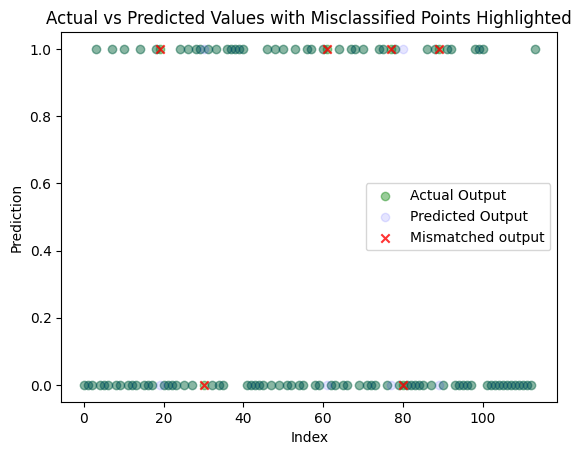

In [397]:
plt.scatter(range(len(y_test_arr)),y_test_arr,color='green',label="Actual Output",alpha=0.4)
plt.scatter(range(len(y_test_arr)),pre_arr,color='blue',label="Predicted Output",alpha=0.1)
plt.scatter(mismatch,y_test_arr[mismatch],color='red',label="Mismatched output",alpha=0.8,marker='x')
plt.xlabel('Index')
plt.ylabel('Prediction')
plt.legend()
plt.title('Actual vs Predicted Values with Misclassified Points Highlighted')


## Using K-Fold Cross-Validation without train_test_split

In [398]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_std,y_train)
    predictions=neigh.predict(X_test_std)
    mean_acc[n-1] = metrics.accuracy_score(y_test, predictions)
    std_acc[n-1]=np.std(predictions==y_test)/np.sqrt(predictions.shape[0])
print(mean_acc)

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

[0.94736842 0.94736842 0.94736842 0.95614035 0.97368421 0.96491228
 0.96491228 0.96491228 0.96491228]
The best accuracy was with 0.9736842105263158 with k= 5


The best accuracy is with 0.9736842105263158 with k= 5


Text(0.5, 1.0, 'Accuracy v/s value of K')

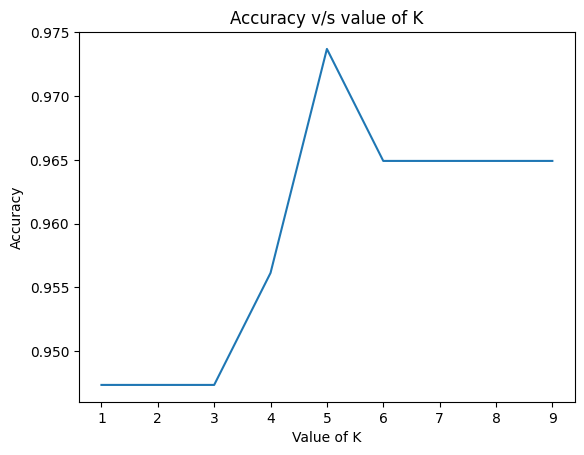

In [399]:
print( "The best accuracy is with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
plt.plot(range(1,10),mean_acc)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s value of K")

In [400]:
knn = KNeighborsClassifier(n_neighbors=5)
k_folds =5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=101)
scores = cross_val_score(knn, X_train_std, y_train, cv=kf)
print("Cross-Validation Scores:", scores)
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.92307692 0.96703297 0.96703297 0.98901099 0.95604396]
Mean Accuracy: 0.9604395604395604


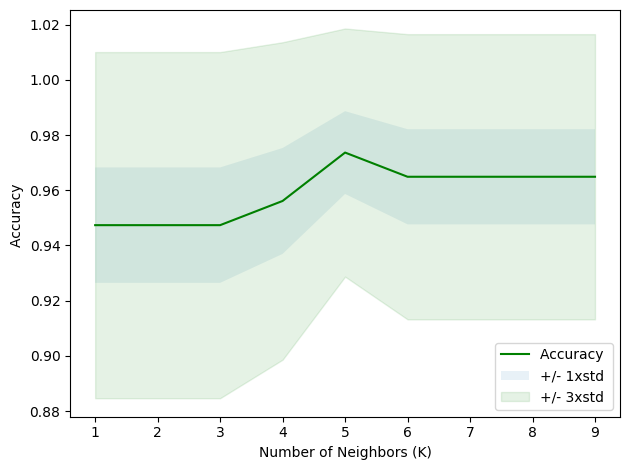

In [401]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()